In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# seting up X and y as input and target data.
X, y = mnist["data"], mnist["target"]


In [3]:
X.shape


(70000, 784)

In [4]:
y.shape

(70000,)

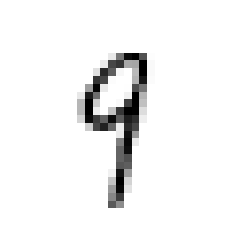

In [5]:

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

img = X[900]
image_shape = img.reshape(28, 28)
plt.imshow(image_shape, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [6]:
y[900]

'9'

In [7]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

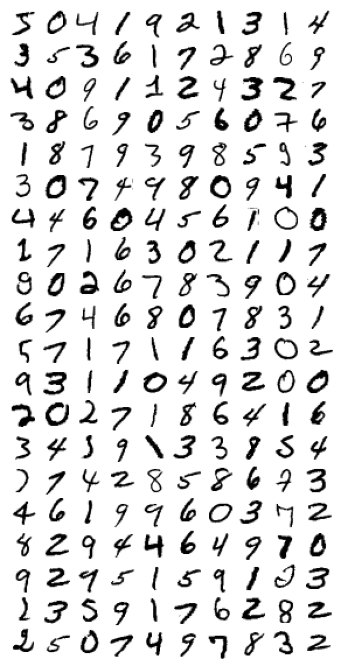

In [8]:
import numpy as np 
plt.figure(figsize=(12,12))
example_images = X[:200]
plot_digits(example_images, images_per_row=10)
plt.show()

In [9]:
# seting up the training and testing data set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
# using kNeighborsClassifier method for train data
from sklearn.neighbors import KNeighborsClassifier
train_data = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [11]:
# fitting up with model 
train_data.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
# pridicting the model with test data.
y_model=train_data.predict(X_test[:60000])
y_model

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [13]:
y_test[:60000]

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_test[:60000], y_model )

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

In [15]:
# finding the accuracy score suing Confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test[:60000], y_model, normalize=True, sample_weight=None)

0.9688